Devemos analisar uma base de dados com informações de condições de solo e temperatura, relacionados com o tipo de produto agrícola.

Além da análise d edados, deveremos construir alguns modelos preditivos e compará-los em termos da sua performance.

**Colunas:**
- N: Quantidade de nitrogênio no solo
- P: Quantidade de fósforo no solo
- K: Quantidade de potássio no solo
- temperature: Temperatura média da região em graus Celsius
- humidity: Umidade média do ar na região
- pH: pH do solo
- rainfall: precipitação em milímetros
- label: tipo de cultura plantada nas condições daquela linha

**Propostas:**
1. Fazer uma análise exploratória na base para se familiarizar com os dados
2. Fazer uma análise descritiva narrando os principais achados da base contendo no mínimo cinco gráficos
3. Encontrar o “perfil ideal” de solo/clima para as plantações, além de discorrer sobre como os três produtos distintos (à escolha do grupo) se comparam com esse perfil ideal. Por exemplo, preferem maior umidade e mais precipitação? Preferem mais calor e menos fósforo? Para esta parte se apoie em análises estatísticas e/ou visuais
4. Desenvolver 5 modelos preditivos (cada um com um algoritmo diferente, conforme visto no capítulo 14) que dadas as condições climáticas e de solo prevejam qual é o melhor produto agrícola a ser cultivado naquelas características. Esta parte da tarefa inclui seguir as boas práticas dos projetos de Machine Learning, bem como avaliar o modelo com métricas pertinentes ao problema.

### Análise descritiva e exploratória

In [1]:
import pandas as pd

df = pd.read_csv('produtos_agricolas.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
# Quantidade de linhas x Quantidade de colunas
df.shape

(2200, 8)

In [3]:
# Verificando o tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
# Análise Estatística Descritiva

df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
# Verificando a quantidade de cada tipo de label
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [6]:
print("Labels únicas:", len(pd.unique(df['label'])))

Labels únicas: 22


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

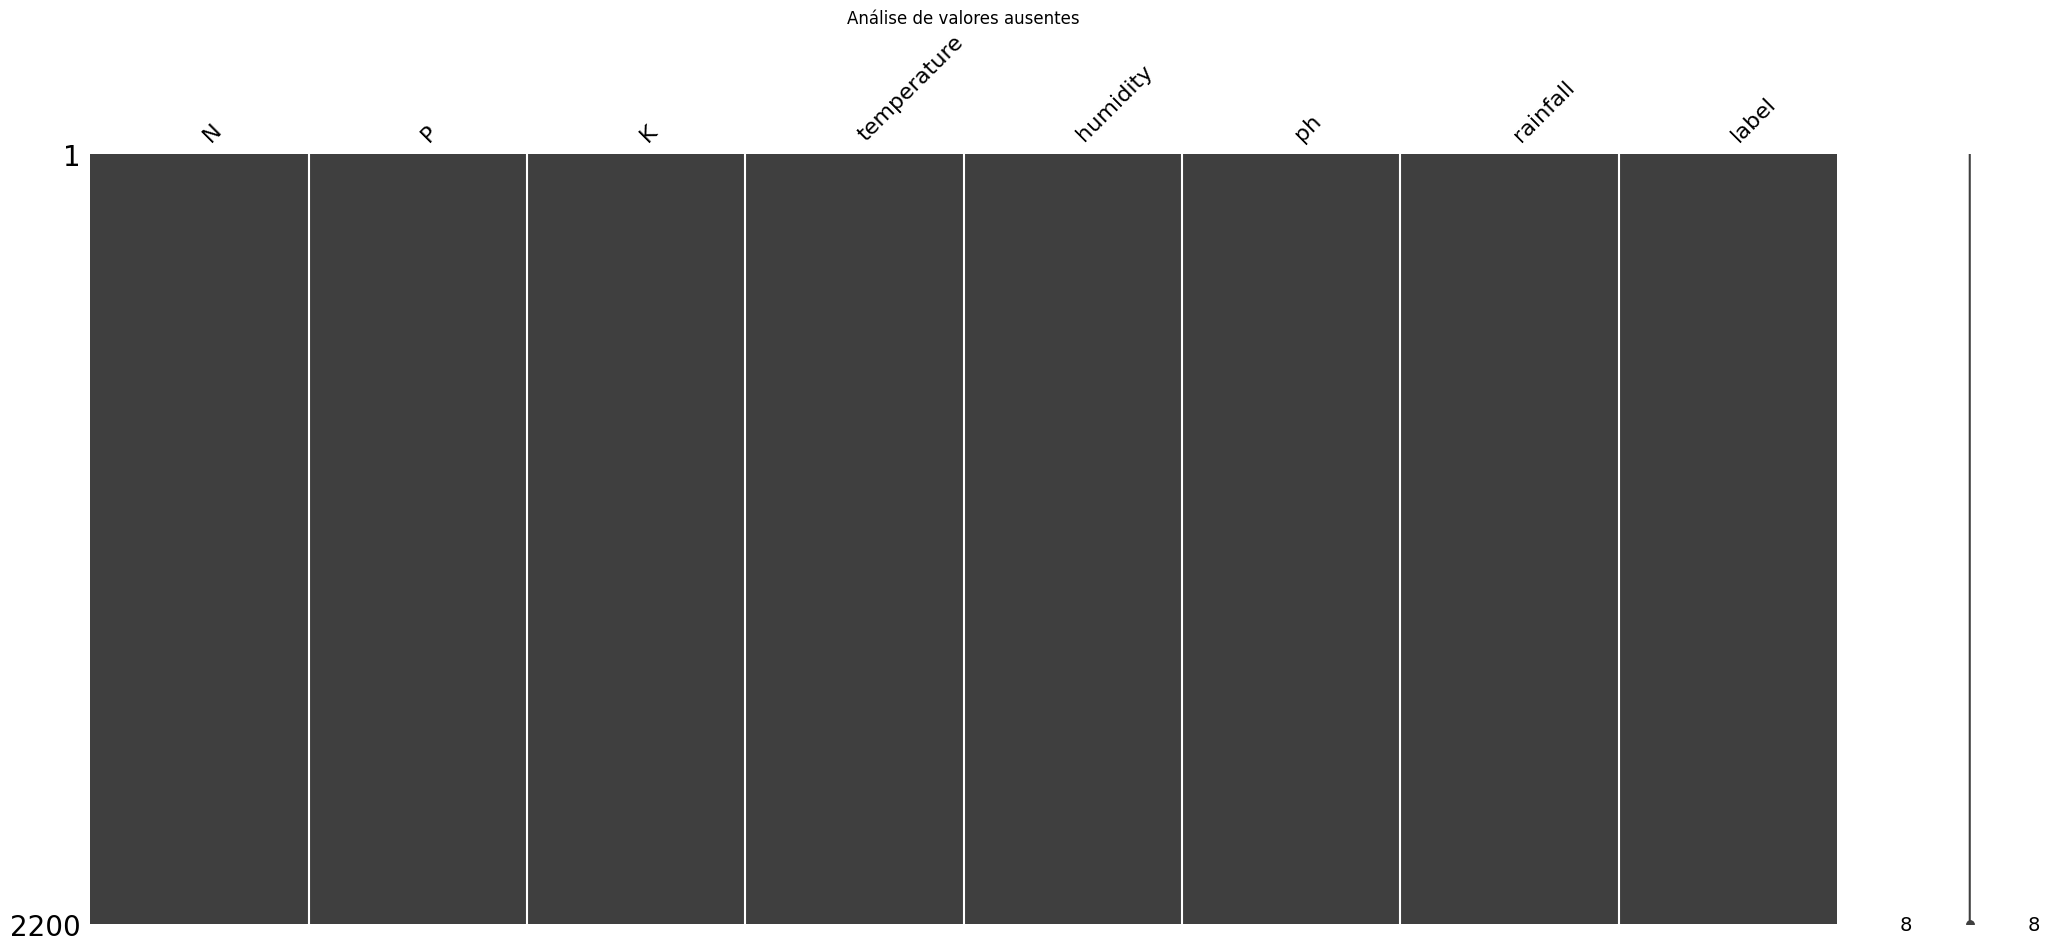

In [7]:
# Análise de dados ausentes
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df)
plt.title("Análise de valores ausentes")

df.isnull().sum()

É possível observar que temos um problema multiclasse, pois temos na nossa base de dados 22 labels únicas.

Cada classe contem 100 dados cada, portanto, temos uma boa distribuição dos dados para cada categoria.

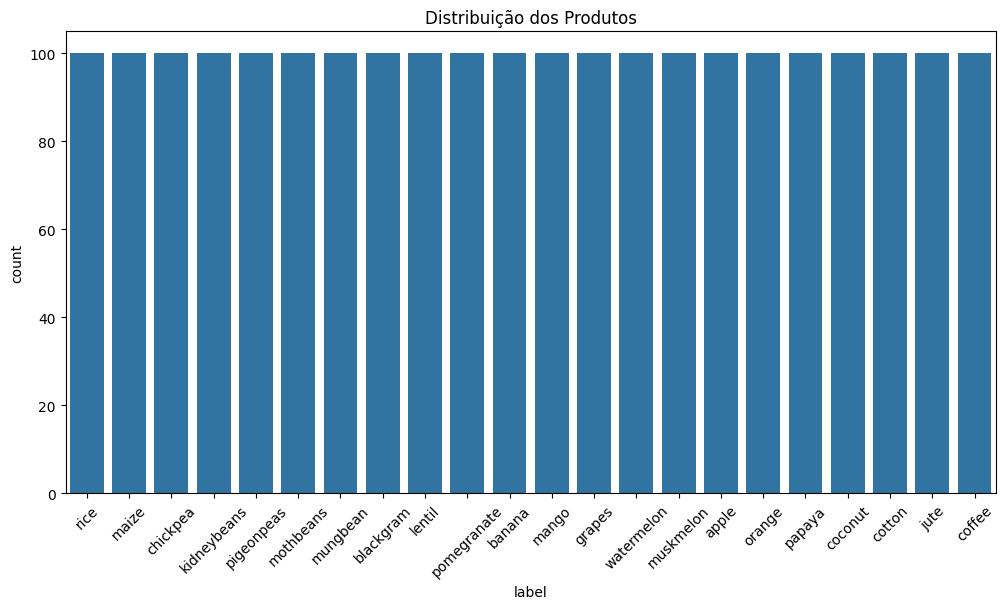

In [8]:
# Distribuição dos labels
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='label', data=df)
plt.title('Distribuição dos Produtos')
plt.xticks(rotation=45)
plt.show()

Como dito anteriormente, é possível observar que todos os dados estão igualmente distribuidos em relação aos labels.

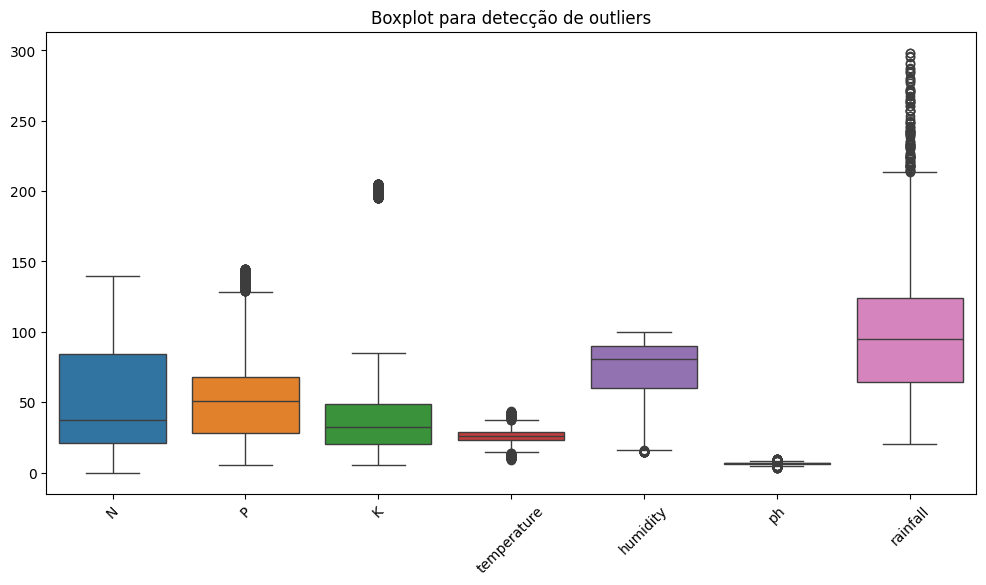

In [9]:
# Detecção de Outliers
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.title("Boxplot para detecção de outliers")
plt.xticks(rotation=45)
plt.show()

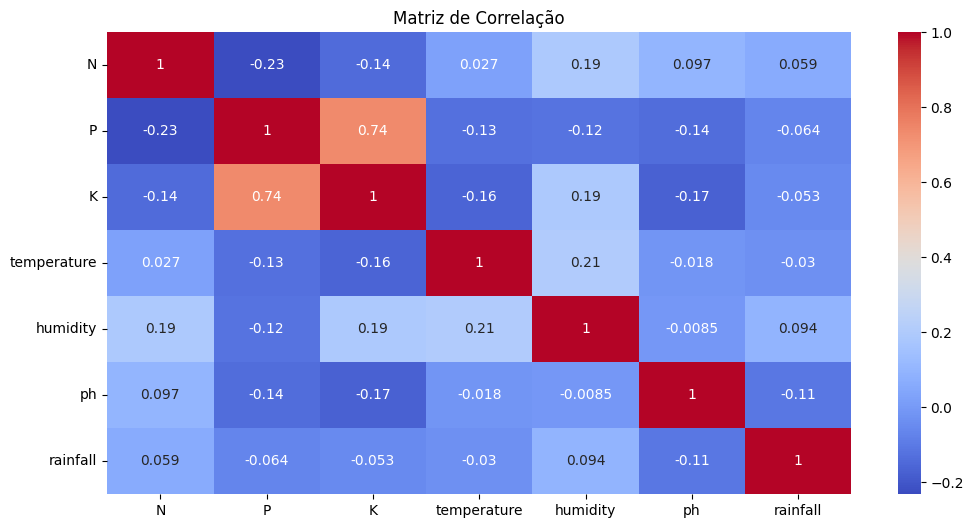

In [10]:
# Matriz de correlação

plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

Com o gráfico acima é possível observar que as variáveis K (potássio) e P (fósforo) estão correlacionadas.

Assim como, também é possível observar uma ligeira correlação entre humidade e temperatura.

Mais abaixo iremos fazer alguns gráficos com essas duas correlações observadas.

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

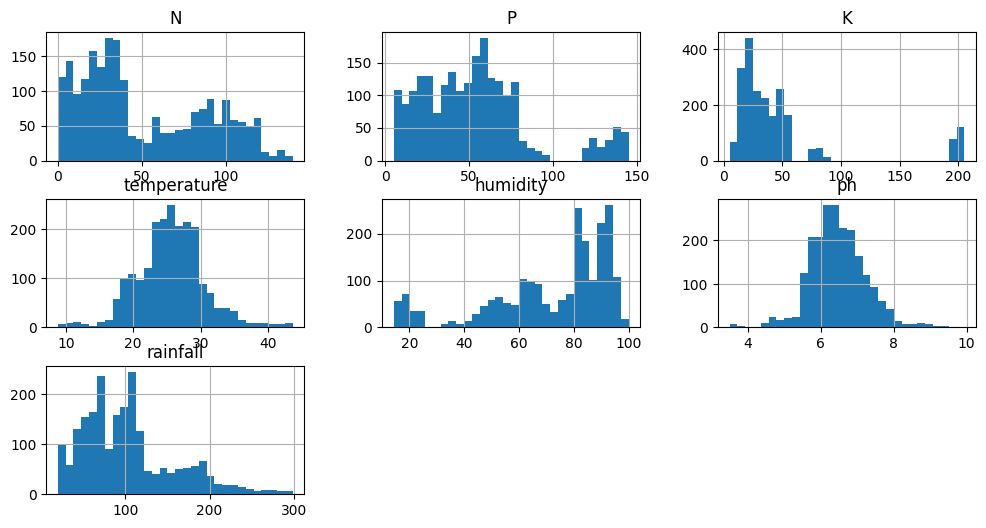

In [11]:
# Histograma para visualizar a distribuição dos dados de cada coluna
df.hist(bins=30,figsize=(12,6))

### Encontrando o "perfil ideal" para cada tipo de planta

No nosso caso, escolhemos três produtos distintos para realizar esta análise:
- Banana
- Laranja
- Maça

Text(0, 0.5, 'Frequência')

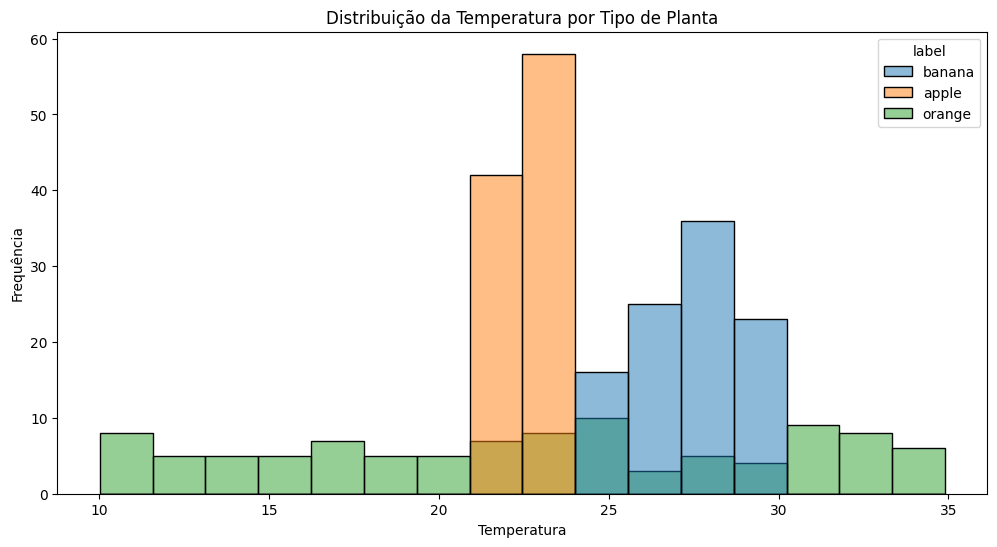

In [12]:
# Histograma para a variável temperatura por planta
plt.figure(figsize=(12,6))

# Query para adquirir apenas os produtos selecionados pelo grupo
products = df.query('label == "banana" | label == "orange" | label == "apple"')

# O parametro "hue" divide os dados com base em uma categoria específica, no caso, a "label"
# Aplica cores diferentes para cada valor dessa categoria
sns.histplot(data=products, x='temperature', hue='label')
plt.title("Distribuição da Temperatura por Tipo de Planta")
plt.xlabel('Temperatura')
plt.ylabel("Frequência")

Para maça, a temperatura ideal está em aproximadamente 20°C a 25°C.

Para banana, a temperatura ideal está em aproximadamente 25°C a 30°C.

Porém, para a laranja não é claro que há um valor "ideal" de temperatura neste gráfico. É possível observar que os valores de temperatura estão bem distribuidos ao longo do gráfico.

Porém abaixo iremos ver uma visualização melhor com um boxplot.

<Axes: xlabel='label', ylabel='temperature'>

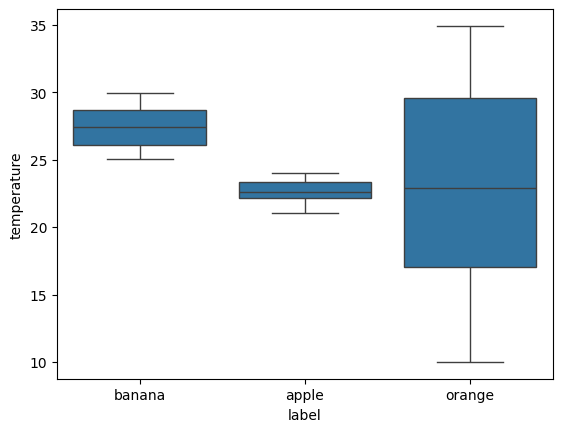

In [13]:
sns.boxplot(data=products, x="label", y='temperature')

Falando especificamente da laranja, por mais que no gráfico anterior não havia uma temperatura ideal, neste gráfico de boxplot é possível observar que a maior parte dos valores de temperatura da laranja estão concentrados entre 17°C / 30°C aproximadamente.

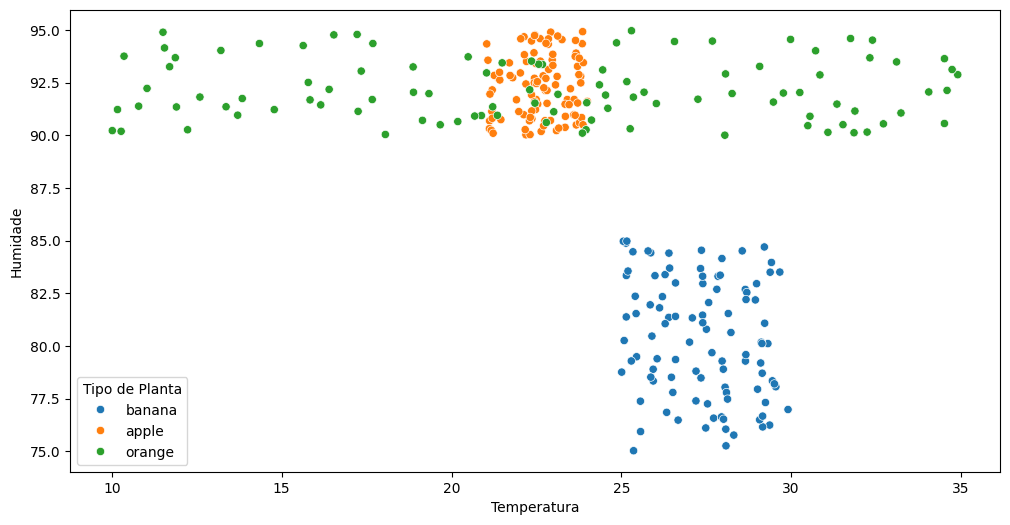

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=products, x='temperature', y='humidity', hue='label')
plt.xlabel("Temperatura")
plt.ylabel("Humidade")
plt.legend(title="Tipo de Planta")

Um gráfico para analisarmos a correlação entre variáveis é o gráfico de dispersão (scatterplot).

Neste gráfico, para os produtos que escolhemos, é possível observar que cada produto está agrupado, então podemos considerar que para cada fruta existe uma faixa de temperatura ou umidade ideal. A distribuição dos valores de banana e maça parecem formar uma espécie de quadrado ou retângulo.

Por exemplo, no caso da **banana**, é necessário que cresça num ambiente de 25°C até 30°C com umidade de 75 até 85. Para a **maça** também parece existir uma faixa ideal de temperatura de 20°C a 25°C e umidade de 90 a 95. Porém a **laranja** aparenta se comportar um pouco diferente, onde a mesma apresenta tolerância à variação de temperatura, variando de 10°C a 35°C, mas exige uma preferência estável em relação à umidade, que vai de 90 a 95.


Em seguida iremos analisar a correlação entre as variáveis Potássio e Fósforo.

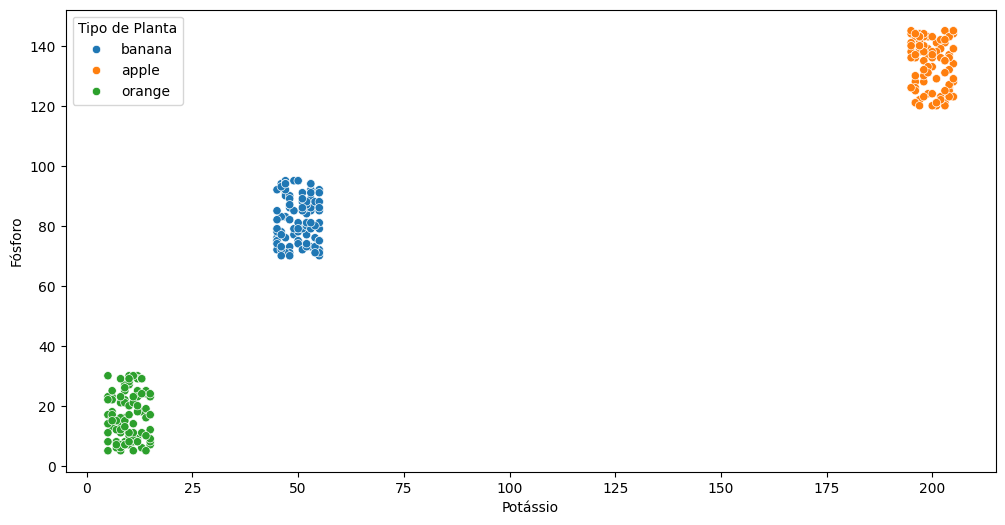

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=products, x='K', y='P', hue='label')
plt.xlabel("Potássio")
plt.ylabel("Fósforo")
plt.legend(title="Tipo de Planta")

Assim como temperatura e umidade, também temos alguns valores "ideias" para cada tipo de fruta em relação a quantidade de potássio e fósforo.

Cada tipo de planta tem valores distintos entre si em relação a quantidade desses nutrientes no solo. Essa relação pode ser relevante para entender as necessidades nutricionais das plantas e isso pode indicar que cada tipo de planta tem um "perfil ideal" específico de potássio e fósforo.

### Treinamento do Modelo de Aprendizagem de Máquina

**Esse modelo tem o objetivo:**

Dado os valores de condições climáticas e de solo prever qual é a categoria de planta ideal para ser cultivada naquele solo.

**Engenharia de Features**

A preparação dos dados antes do treinamento do modelo é essencial, como a separação dos dados em treino e teste, pré processamento dos dados com a normalização/padronização e transformação dos valores categóricos em numéricos.

In [16]:
# 1° Separação das características (X, variáveis independentes) dos alvos (y, variáveis dependentes)
X = df.drop('label', axis=1)

y = df['label']

In [17]:
# 2° Separação dos dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# 3° Pré-processamento dos dados
# Label Encoder para a variável alvo "label"
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()

# Aqui as strings da coluna "label" serão transformadas em números (como em um enum)
y = le.fit_transform(y)
pd.unique(y)

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [19]:
# Normalização das features numéricas com StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Treinamento do Modelo e avaliações de seu desempenho**

Abaixo iremos treinar o modelo com os dados já normalizados e pré processados.

In [20]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

knn_predict = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, knn_predict)
print(f'Acurácia: {accuracy*100:.2f}%')

recall = recall_score(y_test, knn_predict, average='macro')
print(f'Recall: {recall*100:.2f}%')

precision = precision_score(y_test, knn_predict, average='macro')
print(f'Precisão: {precision*100:.2f}%')

f1_score_ = f1_score(y_test, knn_predict, average='macro')
print(f'F1 Score: {f1_score_*100:.2f}%')

Acurácia: 95.45%
Recall: 95.77%
Precisão: 95.64%
F1 Score: 95.35%


In [21]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()

linear_svc.fit(X_train_scaled, y_train)

linear_svc_predict = linear_svc.predict(X_test_scaled)

accuracy = accuracy_score(y_test, linear_svc_predict)
print(f'Acurácia: {accuracy*100:.2f}%')

recall = recall_score(y_test, linear_svc_predict, average='macro')
print(f'Recall: {recall*100:.2f}%')

precision = precision_score(y_test, linear_svc_predict, average='macro')
print(f'Precisão: {precision*100:.2f}%')

f1_score_ = f1_score(y_test, linear_svc_predict, average='macro')
print(f'F1 Score: {f1_score_*100:.2f}%')

Acurácia: 96.00%
Recall: 96.44%
Precisão: 96.25%
F1 Score: 96.23%


In [22]:
# Regressão Logística
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

logReg.fit(X_train_scaled, y_train)

logReg_predict = logReg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, logReg_predict)
print(f'Acurácia: {accuracy*100:.2f}%')

recall = recall_score(y_test, logReg_predict, average='macro')
print(f'Recall: {recall*100:.2f}%')

precision = precision_score(y_test, logReg_predict, average='macro')
print(f'Precisão: {precision*100:.2f}%')

f1_score_ = f1_score(y_test, logReg_predict, average='macro')
print(f'F1 Score: {f1_score_*100:.2f}%')

Acurácia: 96.00%
Recall: 96.24%
Precisão: 96.09%
F1 Score: 96.02%


In [23]:
# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# No caso da Árvode de Decisão, não precisamos obrigatóriamente treina-lo com os dados normalizados
# Dados fora de escala não afetam a árvore de decisão
dt.fit(X_train, y_train)

dt_predict = dt.predict(X_test)

accuracy = accuracy_score(y_test, dt_predict)
print(f'Acurácia: {accuracy*100:.2f}%')

recall = recall_score(y_test, dt_predict, average='macro')
print(f'Recall: {recall*100:.2f}%')

precision = precision_score(y_test, dt_predict, average='macro')
print(f'Precisão: {precision*100:.2f}%')

f1_score_ = f1_score(y_test, dt_predict, average='macro')
print(f'F1 Score: {f1_score_*100:.2f}%')

Acurácia: 98.36%
Recall: 98.40%
Precisão: 98.36%
F1 Score: 98.34%


In [24]:
# Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# No caso da Árvode de Decisão, não precisamos obrigatóriamente treina-lo com os dados normalizados
# Dados fora de escala não afetam a árvore de decisão
rf.fit(X_train, y_train)

rf_predict = rf.predict(X_test)

accuracy = accuracy_score(y_test, rf_predict)
print(f'Acurácia: {accuracy*100:.2f}%')

recall = recall_score(y_test, rf_predict, average='macro')
print(f'Recall: {recall*100:.2f}%')

precision = precision_score(y_test, rf_predict, average='macro')
print(f'Precisão: {precision*100:.2f}%')

f1_score_ = f1_score(y_test, rf_predict, average='macro')
print(f'F1 Score: {f1_score_*100:.2f}%')

Acurácia: 98.91%
Recall: 98.92%
Precisão: 99.01%
F1 Score: 98.87%


Visualização da Matriz de Confusão da nosso melhor modelo (Floresta Aleatória)

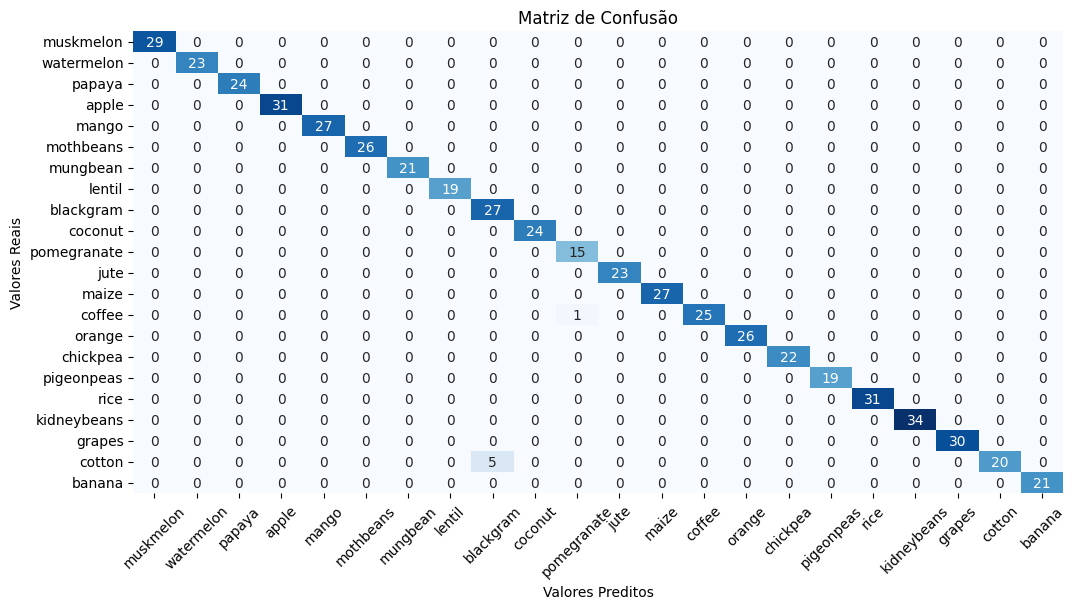

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_predict)

labels = pd.unique(y_test)

plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.xticks(rotation=45)
plt.title('Matriz de Confusão')
plt.show()

Agora vamos visualizar a matriz de confusão do nosso modelo que menos performou.

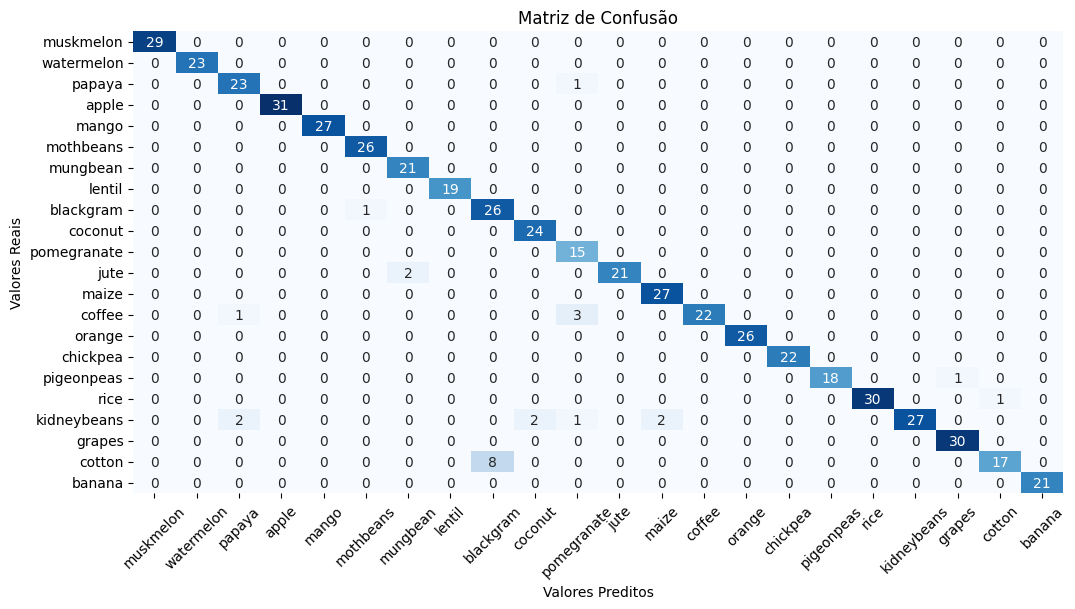

In [26]:
cm = confusion_matrix(y_test, knn_predict)

labels = pd.unique(y_test)

plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.xticks(rotation=45)
plt.title('Matriz de Confusão')
plt.show()

É possível observar que em ambos modelos houveram alguns erros semelhantes, por exemplo:

Os dois modelos de certa forma estavam confundindo o produto "blackgram" com "cotton" e vice versa.

Porém, por mais que este modelo especificamente (com algoritmo KNN) performou menos que os outros modelos que testamos, não apresenta métricas tão ruins, pois estão acima de 90%.